# Fig_03_quasar_colors

We illustrate the region occupied by SDSS quasars from Schneider et al. 2007 catalog, as well as SDSS standard stars from Ivezic+2007 catalog. 

NOTE: All copied from ../code/AA_quasar_colors... 

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import Column
from astropy.table import join
#import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [7]:
#  SDSS S82 DR9 QSOs
File = '../../CRTS_PROJECT/catalogs_SDSS/DB_QSO_S82.dat'
colnames = ['dbID', 'ra', 'dec', 'SDR5ID', 'M_i', 'M_i_corr', 'redshift',
                   'mass_BH', 'Lbol', 'u', 'g', 'r', 'i', 'z', 'Au']

# 9258 QSO ....
sdssQ = Table.read(File, format='ascii', names = colnames)

In [8]:
# SDSS Standard Stars ...
address = '../../CRTS_PROJECT/catalogs_SDSS/stripe82calibStars_v2.6.dat'
sdssS = Table.read(address, format='ascii', 
             names = ['col1', 'RA','Dec','RArms','Decrms','Ntot','Ar', 
            'uNobs','umed', 'ummu', 'umsig', 'umrms', 'umchi2',
            'gNobs','gmed', 'gmmu', 'gmsig', 'gmrms', 'gmchi2',
            'rNobs','rmed', 'rmmu', 'rmsig', 'rmrms', 'rmchi2',
            'iNobs','imed', 'immu', 'imsig', 'imrms', 'imchi2',
            'zNobs','zmed', 'zmmu', 'zmsig', 'zmrms', 'zmchi2']
            )



Choose randomly a subset of 10000 stars 

In [9]:
indices = np.random.choice(np.arange(len(sdssS)), size=10000, replace=False)
sdssSsel = sdssS[indices]
for f in 'ugriz':
    sdssSsel.rename_column(f+'med', f)

Color - color diagrams for 6444 SDSS S82 quasars with PTF, PS1 and CRTS photometry. The convention is to always define a 'color' by subtracting the redder filter from the bluer filter. That way any color has negative values for intrinsically bluer objects - emitting more in the blue part of the spectrum (eg. QSO, RR Lyr), and positive values for redder objects (eg. M stars). Thus using the SDSS base of 'u g r i z' colors,  we form u-g, g-r,  r-i, i-z  colors, as well as g-i, which skips the r filter. Another convention is to plot the bluer color on x-axis (eg. u-g) vs redder color (eg. g-r) on y axis (see \citealt{ivezic2002,sesar2007}). Thus from the upper-left panel to bottom-right panel we cycle through color pairs showing that quasars occupy a distinct locus in each color combination. To calculate photometric offsets between SDSS and PS1, PTF, CRTS, we employ standard stars with colors based on the region occupied by quasars in the u-g vs g-i color space. 

Modify the code to plot g-i vs r-i  rather than r-i vs i-z,  since this would better illustrate  that g-i  gives a better wavelength separation than g-r. Both g-r and g-i are better choices than u-g because in u-g there is not much overlap in color between stars and quasars, so we would not be able to apply the color transformations as well . 

## Production

Remove the color from contours of stellar locus,  move the legend out, add g vs u-g diagram 

In [10]:
import seaborn as sns

In [11]:
sns.__version__

'0.11.0'

x = u-g
y = g


/Users/chris/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'g')

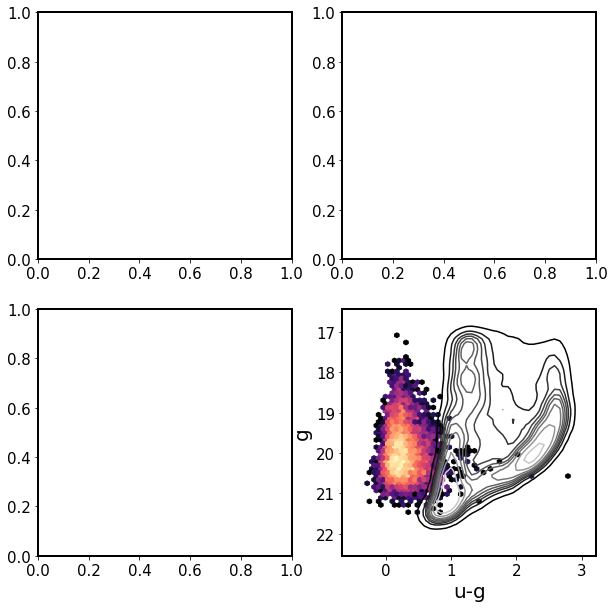

In [14]:
%matplotlib inline
fig,axs = plt.subplots(2,2, figsize=(10,10))
ax = np.ravel(axs)
# plot the third ( bottom right ) axis 
extent = [-0.5,3,17,22.]
print('x = u-g')
print('y = g')
for obj in plot.keys():
    cat = plot[obj]
    x  = cat['u'] - cat['g'] # u-g 
    y =  cat['g']
    if obj == 'qso': 
        image = ax[3].hexbin(x,y, mincnt=3, extent = extent, 
                gridsize=50, bins='log', cmap  = 'magma')
    if obj == 'stars' : 
        mx = (extent[0] < x ) * (x < extent[1])
        my = (extent[2] < y ) * (y < extent[3] )
        m = mx * my 
        image1 = sns.kdeplot(x[m],y[m], cmap='Greys_r', gridsize=50, 
                    shade=False,  bw_adjust=0.65,legend=False, ax=ax[3],
                         levels=10   ) 

ax[3].invert_yaxis()
ax[3].set_xlabel('u-g')
ax[3].set_ylabel('g')

#xx, yy, z = mod._statsmodels_bivariate_kde(xq,yq,'scott',100,3,None)
#outline = ax[i].contour(xx, yy, z , 
#                        levels = mod.cumsum_contour_levels(z, qsoContourLevels), 
#                         colors = 'blue', linestyles='-' ,linewidths=2)   

x =  u - g
y =  g - r

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.1, 0.3, 0.7, 0.9]
x =  g - r
y =  r - i

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.1, 0.3, 0.7, 0.9]
x =  g - i
y =  r - i

Picking KDE pdf pixels that would include     the following percentages of the input data:
[0.1, 0.3, 0.7, 0.9]
x =  u - g
y =  g - r
x =  g - r
y =  r - i
x =  g - i
y =  r - i
x = u-g
y = g


/Users/chris/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


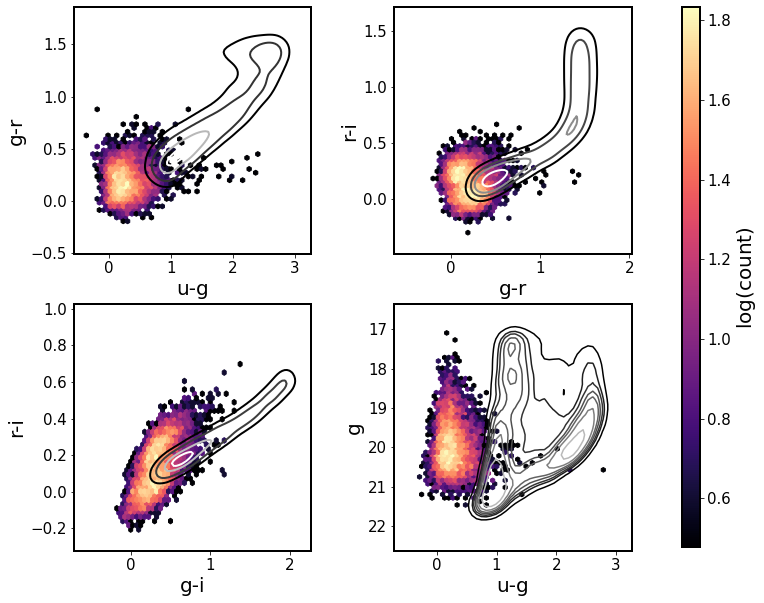

In [36]:
# Plot quasars and stars on color-color diagrams ...
%matplotlib inline

xlabels = ['u-g', 'g-r', 'g-i']
ylabels = ['g-r', 'r-i', 'r-i']
extent = [[-0.5,3, -0.3, 1.7 ], # xmin,xmax, ymin, ymax    
           [-0.5,1.8, -0.3, 1.5],
           [-0.5,2, -0.3, 1.],
         ]

contourLevels = [0.1,0.3,0.7,0.9]

fig,axs = plt.subplots(2,2, figsize=(10,10))
ax = np.ravel(axs)

plot =  {'stars':sdssSsel, 'qso': sdssQ }

import seaborn as sns 
import matplotlib as mpl

# plot the axes 0:2
for obj in plot.keys():
    cat = plot[obj]
    fseq = 'ugriz' # filter sequence 
    for i in range(len(xlabels)):
        x1,x2 = xlabels[i][0], xlabels[i][2]
        y1,y2 = ylabels[i][0], ylabels[i][2]
        print('x = ',x1,'-', x2)
        print('y = ',y1,'-', y2)
        
        x  = cat[x1] - cat[x2]
        y =  cat[y1] - cat[y2]
        
        if obj == 'qso': 
            image = ax[i].hexbin(x,y, mincnt=3, extent = extent[i], 
                    gridsize=50, bins='log',
                    cmap  = 'magma')
        if obj == 'stars' : 
            mx = (extent[i][0] < x ) * (x < extent[i][1])
            my = (extent[i][2] < y ) * (y < extent[i][3] )
            m = mx * my 
            
            xx, yy, z = mod._statsmodels_bivariate_kde(x[m],y[m],'scott',100,3,None)
            outline = ax[i].contour(xx, yy, z , 
                       levels = mod.cumsum_contour_levels(z, contourLevels), 
                         cmap='Greys_r', linestyles='-' ,linewidths=2)   


#             image1 = sns.kdeplot(x[m],y[m], cmap='Greys_r', gridsize=50, 
#                         shade=False, bw_adjust=0.75,legend=False, ax=ax[i],
#                                 levels=8,thresh=.1) 

# plot the third ( bottom right ) axis 
extent = [-0.5,3,17,22.]
print('x = u-g')
print('y = g')
for obj in plot.keys():
    cat = plot[obj]
    x  = cat['u'] - cat['g'] # u-g 
    y =  cat['g']
    if obj == 'qso': 

        image = ax[3].hexbin(x,y, mincnt=3, extent = extent, 
                gridsize=50, bins='log', cmap  = 'magma')
    if obj == 'stars' : 
        mx = (extent[0] < x ) * (x < extent[1])
        my = (extent[2] < y ) * (y < extent[3] )
        m = mx * my 
        image1 = sns.kdeplot(x[m],y[m], cmap='Greys_r', gridsize=50, 
                    shade=False,  bw_adjust=0.75,legend=False, ax=ax[3],
                         levels=8 , thresh=0.1 ) 

ax[3].invert_yaxis()
ax[3].set_xlabel('u-g')
ax[3].set_ylabel('g')

# add axis labels ... 
for j in range(len(xlabels)):
    ax[j].set_xlabel(xlabels[j])
    ax[j].set_ylabel(ylabels[j])

fig.subplots_adjust(wspace=0.35)

# add colorbars  
left, bottom, width, height = 0.97,0.13, 0.025,0.75

# cbar for qso 
cax = fig.add_axes([left,bottom,width,height])


vmin, vmax = image.get_clim()
norm = mpl.colors.Normalize(vmin=np.log10(vmin), vmax=np.log10(vmax))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=image.get_cmap())
cmap.set_array([])

plt.colorbar(mappable = cmap, cax = cax, orientation='vertical',
            label=r'$\log{(\mathrm{count})}$')


# cbar f
#ax[-1].set_visible(False) # make it invisible  
#plt.savefig('fig03.pdf', bbox_inches='tight', dpi=100)